In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV ,cross_val_score

In [2]:
data_train = pd.read_csv('E:/Sonu/ML_Algorithms/Adult_dataset/adult_train.csv')

In [3]:
data_test = pd.read_csv('E:/Sonu/ML_Algorithms/Adult_dataset/adult_test.csv')

In [4]:
data_train.shape

(32561, 15)

In [5]:
data_test.shape


(16282, 15)

In [6]:
data_train.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
data_test['Target'].unique()

array([nan, ' <=50K.', ' >50K.'], dtype=object)

In [8]:
#removing incorrect labels from test dataset.
data_test = data_test[(data_test['Target'] == ' >50K.') | (data_test['Target']==' <=50K.')]


In [9]:
data_test

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [10]:
data_train.loc[data_train['Target'] == ' <=50K','Target']=0
data_train.loc[data_train['Target'] == ' >50K','Target' ]=1

In [11]:
data_train['Target'].unique()

array([0, 1], dtype=int64)

In [12]:
data_test.loc[data_test['Target'] == ' <=50K.','Target']=0 
data_test.loc[data_test['Target'] == ' >50K.','Target']=1

In [13]:
data_test['Target'].unique()

array([0, 1], dtype=int64)

In [14]:
data_test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,16281,73,35,461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Workclass,15318,8,Private,11210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,16281,NaN,NaN,NaN,189436,105715,13492,116736,177831,238384,1.4904e+06
Education,16281,16,HS-grad,5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Num,16281,NaN,NaN,NaN,10.0729,2.56755,1,9,10,12,16
Martial_Status,16281,7,Married-civ-spouse,7403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,15315,14,Prof-specialty,2032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relationship,16281,6,Husband,6523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,16281,5,White,13946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,16281,2,Male,10860,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data_train['Target'].value_counts()

0    24720
1     7841
Name: Target, dtype: int64

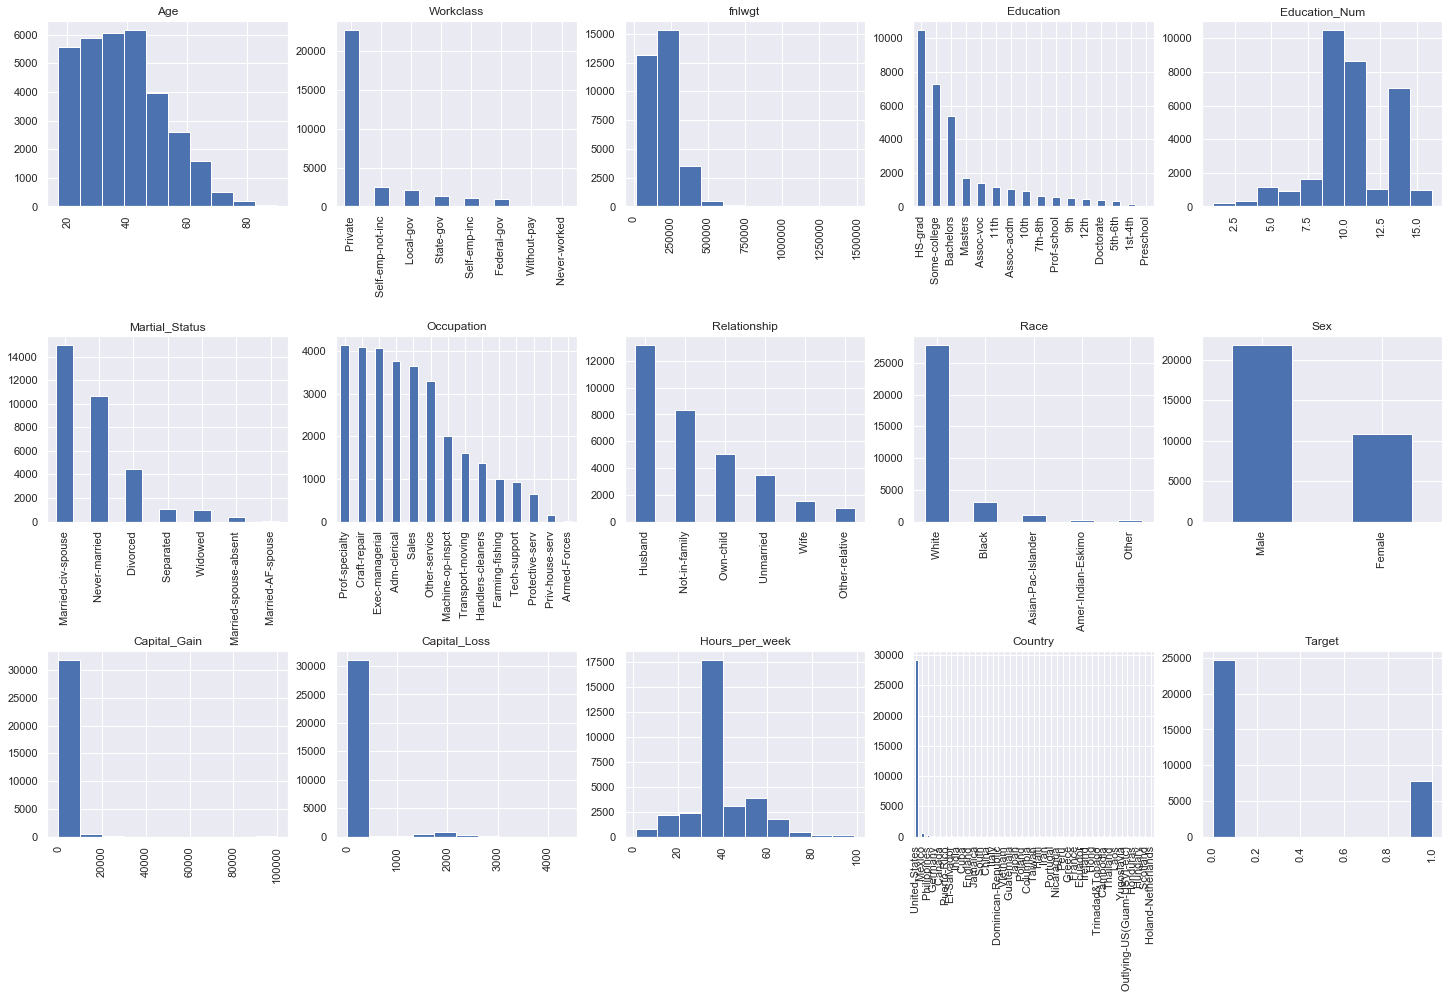

In [16]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(data_train.shape[1]) / cols)
for i, column in enumerate(data_train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data_train.dtypes[column] == np.object:
        data_train[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data_train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [17]:
data_train.columns.shape


(15,)

In [18]:
data_train.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education_Num      int64
Martial_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_per_week     int64
Country           object
Target             int64
dtype: object

In [19]:
data_test.dtypes

Age                object
Workclass          object
fnlwgt            float64
Education          object
Education_Num     float64
Martial_Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_Gain      float64
Capital_Loss      float64
Hours_per_week    float64
Country            object
Target              int64
dtype: object

In [20]:
#Changing Datatypes

data_test['Age']  = data_test['Age'].astype(int)

In [21]:
data_test['fnlwgt'] = data_test['fnlwgt'].astype(int)

In [22]:
data_test['Education_Num'] = data_test['Education_Num'].astype(int)

In [23]:
data_test['Capital_Gain'] = data_test['Capital_Gain'].astype(int)

In [24]:
data_test['Hours_per_week'] = data_test['Hours_per_week'].astype(int)

In [25]:
data_test['Capital_Loss'] = data_test['Capital_Loss'].astype(int)


In [26]:
#choosing Categorical and numberical features for substituting missing values

categorical_feature = [c for c in data_train.columns if data_train[c].dtype.name == 'object']
numerical_feature = [n for n in data_train.columns if data_train[n].dtype.name == 'int64']


In [27]:
print(categorical_feature)
print(numerical_feature)

['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']
['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Target']


In [28]:
data_train.info()#missing values in Workclass , Occupation,Country

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         30725 non-null object
fnlwgt            32561 non-null int64
Education         32561 non-null object
Education_Num     32561 non-null int64
Martial_Status    32561 non-null object
Occupation        30718 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital_Gain      32561 non-null int64
Capital_Loss      32561 non-null int64
Hours_per_week    32561 non-null int64
Country           31978 non-null object
Target            32561 non-null int64
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [29]:
#filling missing data

for c in categorical_feature:
    data_train[c].fillna(data_train[c].mode()[0],inplace=True)
    data_test[c].fillna(data_test[c].mode()[0],inplace=True)
    


In [30]:
for n in numerical_feature:
    data_train[n].fillna(data_train.median(),inplace=True)
    data_test[n].fillna(data_test.median(),inplace=True)

In [31]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
fnlwgt            32561 non-null int64
Education         32561 non-null object
Education_Num     32561 non-null int64
Martial_Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital_Gain      32561 non-null int64
Capital_Loss      32561 non-null int64
Hours_per_week    32561 non-null int64
Country           32561 non-null object
Target            32561 non-null int64
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [32]:
data_train = pd.concat([data_train[numerical_feature],pd.get_dummies(data_train[categorical_feature])],axis = 1)

In [33]:
data_test = pd.concat([data_test[numerical_feature],pd.get_dummies(data_test[categorical_feature])],axis = 1)

In [34]:
data_train.head()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
data_test.head()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
1,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,336951,12,0,0,40,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,44,160323,10,7688,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,18,103497,10,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
data_train.shape , data_test.shape

((32561, 106), (16281, 105))

In [37]:
print(data_train.columns)
print(data_test.columns)

Index(['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss',
       'Hours_per_week', 'Target', 'Workclass_ Federal-gov',
       'Workclass_ Local-gov', 'Workclass_ Never-worked',
       ...
       'Country_ Portugal', 'Country_ Puerto-Rico', 'Country_ Scotland',
       'Country_ South', 'Country_ Taiwan', 'Country_ Thailand',
       'Country_ Trinadad&Tobago', 'Country_ United-States',
       'Country_ Vietnam', 'Country_ Yugoslavia'],
      dtype='object', length=106)
Index(['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss',
       'Hours_per_week', 'Target', 'Workclass_ Federal-gov',
       'Workclass_ Local-gov', 'Workclass_ Never-worked',
       ...
       'Country_ Portugal', 'Country_ Puerto-Rico', 'Country_ Scotland',
       'Country_ South', 'Country_ Taiwan', 'Country_ Thailand',
       'Country_ Trinadad&Tobago', 'Country_ United-States',
       'Country_ Vietnam', 'Country_ Yugoslavia'],
      dtype='object', length=105)


In [38]:
set(data_train.columns) - set(data_test.columns)

{'Country_ Holand-Netherlands'}

In [41]:
data_train.shape , data_test.shape

((32561, 106), (16281, 106))

In [40]:
data_test['Country_ Holand-Netherlands'] = 0

In [42]:
set(data_train.columns) - set(data_test.columns)

set()

In [43]:
X_train = data_train.drop(['Target'],axis = 1)

In [44]:
y_train = data_train['Target']

In [45]:
X_test = data_test.drop(['Target'],axis = 1)

In [50]:
y_test = data_test['Target']

#fitting DecisionTree without Parameter trainning

In [47]:
cls_tree = DecisionTreeClassifier(max_depth = 3 , random_state=17)
cls_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=17, splitter='best')

In [51]:
Pred = cls_tree.predict(X_test)

In [54]:
accuracy_score(y_test, Pred)

0.8447884036607088

DecisionTree with Parameter Training

In [55]:
tree_params = {'max_depth':range(2,11)}
locally_best_tree = GridSearchCV(cls_tree,tree_params,cv=5,n_jobs=-1,verbose=True)

In [56]:
locally_best_tree.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   12.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=-1, param_grid={'max_depth': range(2, 11)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, 

In [57]:
locally_best_tree.best_params_ ,locally_best_tree.best_score_

({'max_depth': 9}, 0.8565768864592611)

In [58]:
#Training decision tree at max depth 0f 9

tune_tree = DecisionTreeClassifier(max_depth = 9, random_state=17)
tune_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=17, splitter='best')

In [59]:
pred_tune = tune_tree.predict(X_test)

In [60]:
accuracy_score(y_test,pred_tune)

0.847798046803022

#Training Random forest for improved accuracy 



In [61]:
rf = RandomForestClassifier(n_estimators=100,random_state=17)

In [62]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=17, verbose=0,
                       warm_start=False)

In [63]:
%%time
cv_score=cross_val_score(rf,X_train,y_train,cv=3)

Wall time: 17.4 s


In [64]:
cv_score , cv_score.mean()

(array([0.85194398, 0.85572139, 0.859578  ]), 0.8557477912289437)

In [65]:
rf_pred = rf.predict(X_test)

In [66]:
accuracy_score(y_test,rf_pred)

0.8585467723112831

#further tuning RF tree improve accuracy



In [67]:
forest_params = {'max_depth':range(10,16), 'max_features':range(5,105,20)}
locally_best_tree = GridSearchCV(RandomForestClassifier(n_estimators=10, random_state=17,n_jobs=-1),
                           forest_params,cv=3,verbose =1)

In [68]:
locally_best_tree.fit(X_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=-1,
                                              oob_score=False, random_state=17,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_de

In [69]:
locally_best_tree.best_params_ ,locally_best_tree.best_score_

({'max_depth': 14, 'max_features': 45}, 0.8619821258560855)

In [70]:
tune_pred_rf = locally_best_tree.predict(X_test)

In [71]:
accuracy_score(y_test,tune_pred_rf)

0.8611264664332657